This is a $\lambda \alpha \tau \alpha \chi$ symbol

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
from scipy.optimize import curve_fit

10000


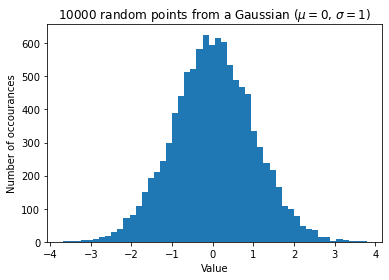

In [39]:
Data=[]
for i in range(0, 10000): 
    Data.append(random.gauss(0, 1)) #Generating 10000 random values from a gaussian
plt.hist(Data, bins = 50) #50 is magic number but it looks good
plt.title(r'10000 random points from a Gaussian ($\mu = 0$, $\sigma = 1$)')
plt.ylabel('Number of occourances')
plt.xlabel('Value')
print(len(Data))

Text(0, 0.5, 'Data Value')

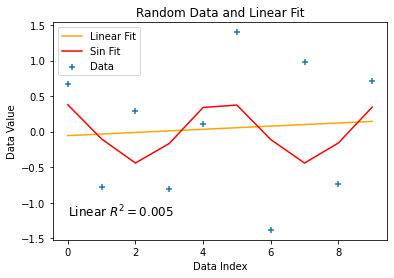

In [58]:
Data=[]
xaxis=np.linspace(0, 9, 10)
for i in range(len(xaxis)):
    Data.append(random.gauss(0, 1))

plt.scatter(xaxis, Data, label = 'Data', marker = '+')
def LinearFit(x, slope, y_intercept): #defining a line
    return(x*slope + y_intercept) #y=mx+b

def SinFit(x, coeffecient, amplitude, phase): #defining a sin wave
    return(amplitude * np.sin(coeffecient * x + phase)) #Asin(bx+c)

popt, pcov = curve_fit(LinearFit, xaxis, Data) #scipy.optimize.curve_fit does all the work
fitslope, fityint = popt #popt is optimized parameters. Spits out fit params for every variable in your function
fitpoints = LinearFit(xaxis, fitslope, fityint) #Now I can use fitted params to generate my fit and plot it
plt.plot(xaxis, fitpoints, color = 'orange', label = 'Linear Fit')
#I'm also going to do an R^2 calculation to show how good the fit is. Residuals show up often in science
#Residuals are just data - fit. Hopefully it's close to 0, but this can show you how much and where the fit is off
residuals = Data - fitpoints
total_residual_sq = np.sum(residuals**2) #R^2 means we need to square stuff
total_data_variance = np.sum((Data - np.mean(Data))**2) #you might recognize this as sorta standard deviation
r_squared = 1 - (total_residual_sq / total_data_variance)
#R^2 calculates how much of the residuals are not explained by data variance, and instead by fit error
#close to 1 is good, 0 is bad. You could use this to more quantitatively justify your fit being good or not
plt.text(0, -1, fr"Linear $R^2 = {r_squared:.3f}$", fontsize=12, verticalalignment='top')

#I'm being extra here but showing off that curve_fit works for way more stuff. If you can define a function it will optimize
poptsin, pcovsin = curve_fit(SinFit, xaxis, Data) #scipy.optimize.curve_fit does all the work
fitsincoeffecient, fitsinamplitude, fitsinphase = poptsin #popt is optimized parameters. Spits out fit params for every variable in your function
fitpointssin = SinFit(xaxis, fitsincoeffecient, fitsinamplitude, fitsinphase) #Now I can use fitted params to generate my fit and plot it
plt.plot(xaxis, fitpointssin, color = 'red', label = 'Sin Fit')

plt.legend()
plt.title('Random Data and Linear Fit')
plt.xlabel('Data Index')
plt.ylabel('Data Value')